In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import timedelta


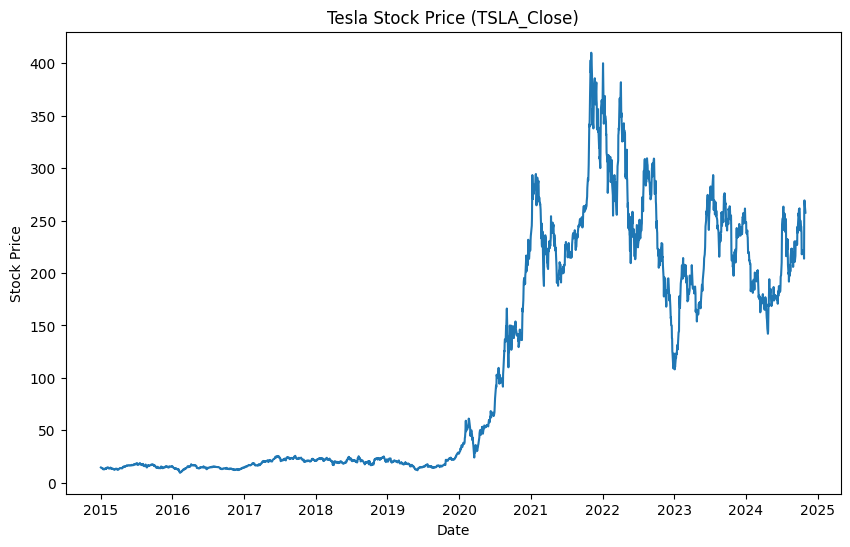

Training set shape: (1979,), Test set shape: (495,)


In [13]:
# Load cleaned data
df = pd.read_csv('tesla_bnd_spy_cleaned_data_with_columns.csv', index_col='Date', parse_dates=True)

# Extract Tesla's stock price data (TSLA_Close)
tesla_data = df['TSLA_Close']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(tesla_data)
plt.title('Tesla Stock Price (TSLA_Close)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Split the data into training and testing sets
train_size = int(len(tesla_data) * 0.8)  # 80% training, 20% testing
train, test = tesla_data[:train_size], tesla_data[train_size:]

# Display the shapes of the training and test sets
print(f"Training set shape: {train.shape}, Test set shape: {test.shape}")


In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Check if the data is stationary
adf_test(tesla_data)


ADF Statistic: -1.1507672706146068
p-value: 0.6944080657685293
Critical Values: {'1%': np.float64(-3.433026277967909), '5%': np.float64(-2.862722353917318), '10%': np.float64(-2.56739941472018)}
